<a href="https://colab.research.google.com/github/sh-ujif/-/blob/main/%E5%88%86%E6%9E%90%E3%83%AC%E3%83%9D%E3%83%BC%E3%83%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

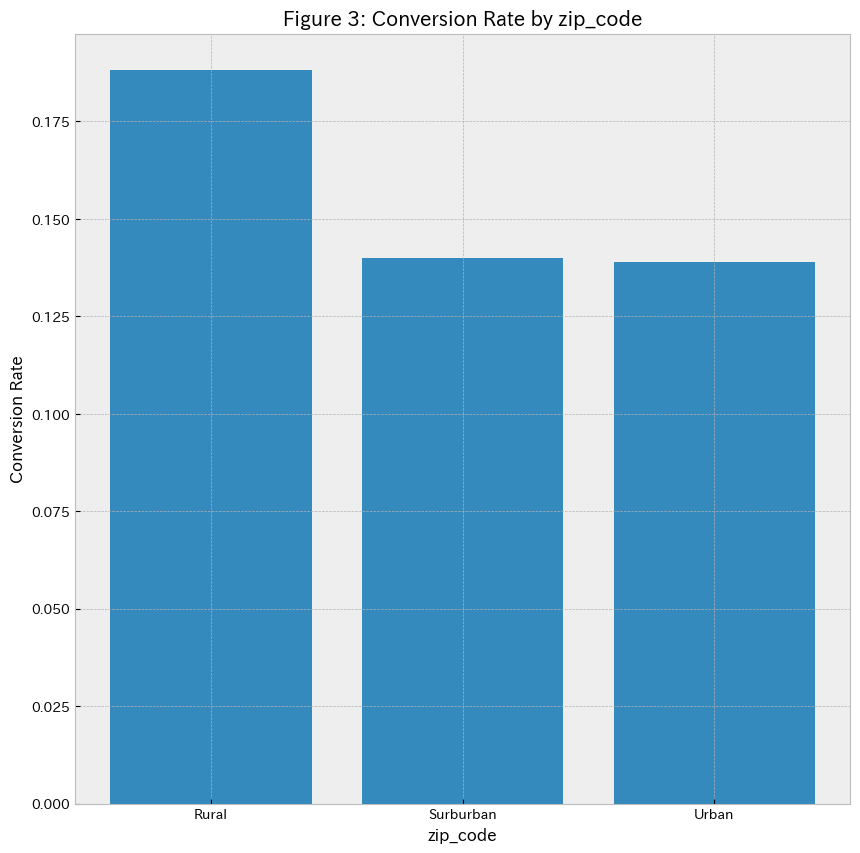

In [ ]:
#図 3. zip_code 別のコンバージョン率
conv_by_zip = df.groupby('zip_code')['conversion'].mean().reset_index()

plt.figure()
plt.bar(conv_by_zip['zip_code'], conv_by_zip['conversion'])
plt.xlabel('zip_code')
plt.ylabel('Conversion Rate')
plt.title('Figure 3: Conversion Rate by zip_code')
from google.colab import files
#画像を保存
fn="fig_test2.png"
plt.savefig(fn)
files.download(fn)
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

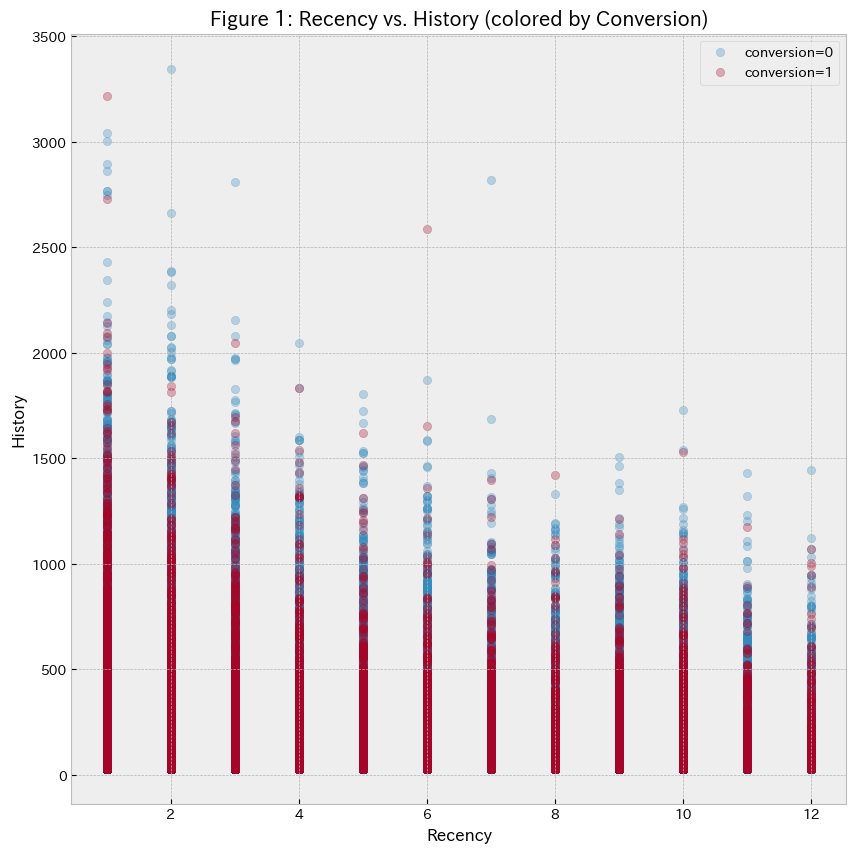

In [ ]:
# (サンプルコード: conversionに応じて色分けした散布図)
plt.figure()
plt.scatter(df[df['conversion']==0]['recency'],
            df[df['conversion']==0]['history'],
            alpha=0.3, label='conversion=0')

plt.scatter(df[df['conversion']==1]['recency'],
            df[df['conversion']==1]['history'],

            alpha=0.3, label='conversion=1')

plt.xlabel('Recency')
plt.ylabel('History')
plt.title('Figure 1: Recency vs. History (colored by Conversion)')
plt.legend()
from google.colab import files
#画像を保存
fn="fig_test2.png"
plt.savefig(fn)
files.download(fn)
plt.show()



In [ ]:


# ダミー変数化
df_dummies = pd.get_dummies(df, columns=['zip_code', 'channel', 'offer'], drop_first=True)

# 説明変数と目的変数の分割
X = df_dummies.drop(columns=['conversion'])
y = df_dummies['conversion']

# 定数追加
X = sm.add_constant(X)

# データ型の確認
print(X.dtypes)

# データ型変換
X = X.apply(pd.to_numeric, errors='coerce')

# 欠損値処理
X = X.dropna()

# ロジスティック回帰モデル
model = sm.Logit(y, X).fit()
print(model.summary())


const                 float64
recency                 int64
history               float64
used_discount           int64
used_bogo               int64
is_referral             int64
zip_code_Surburban       bool
zip_code_Urban           bool
channel_Phone            bool
channel_Web              bool
offer_Discount           bool
offer_No Offer           bool
dtype: object


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# ---- ロジスティック回帰 ----
import statsmodels.api as sm
df_dummies = pd.get_dummies(df,  columns=['zip_code','channel','offer'], drop_first=True)
X = df_dummies.drop('conversion', axis=1)
y = df_dummies['conversion']
X = sm.add_constant(X)
model = sm.Logit(y, X).fit()
print(model.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

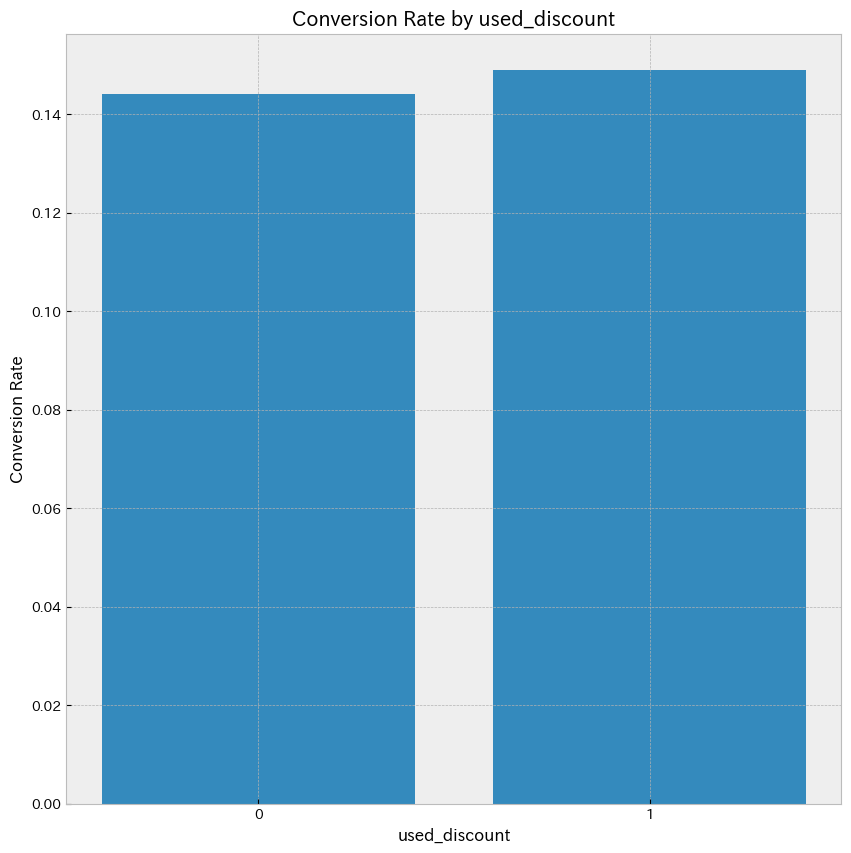

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

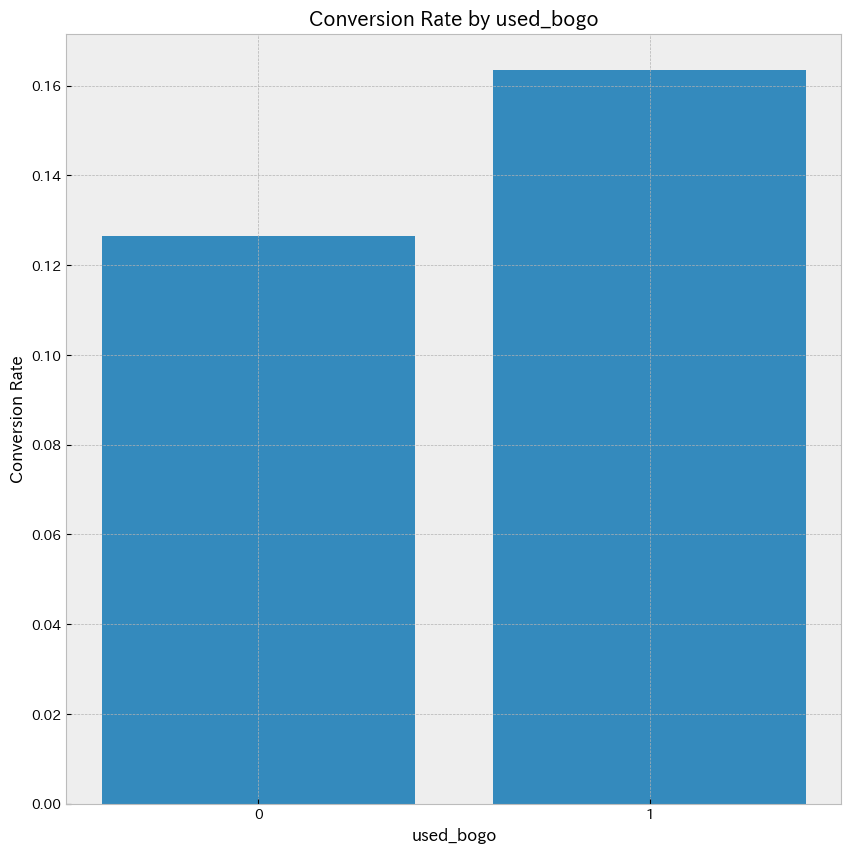

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

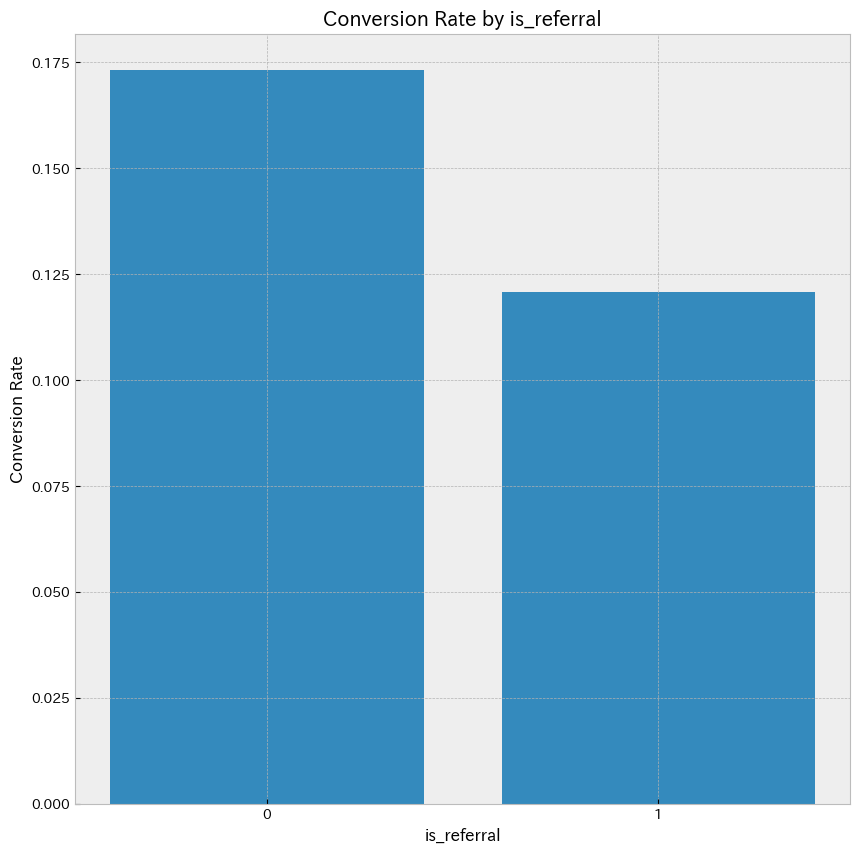

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

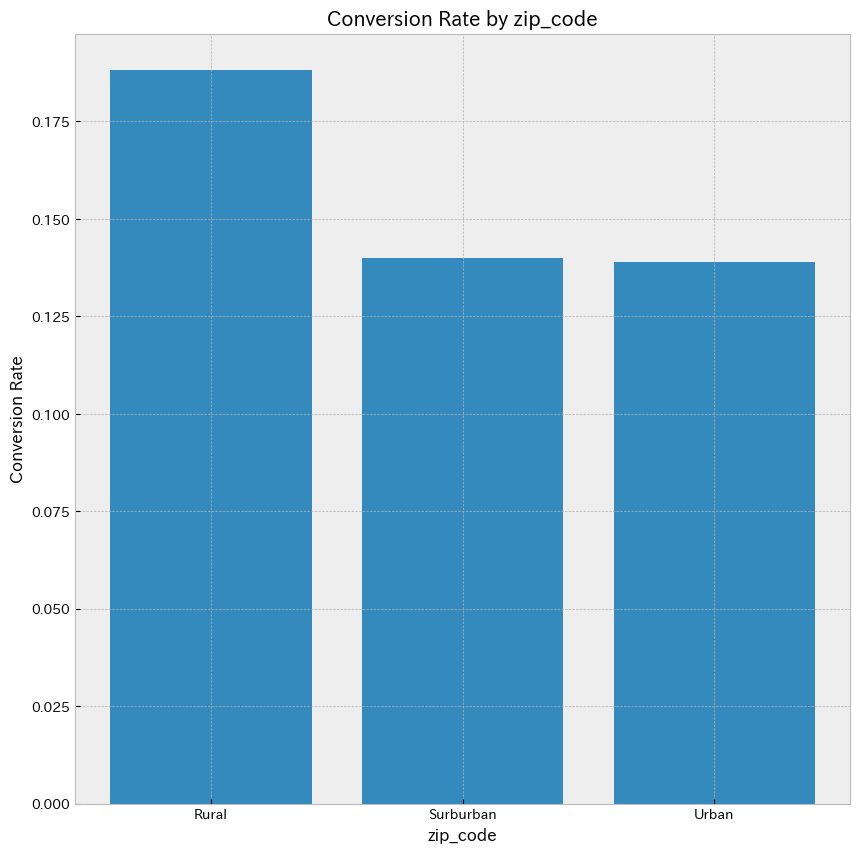

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

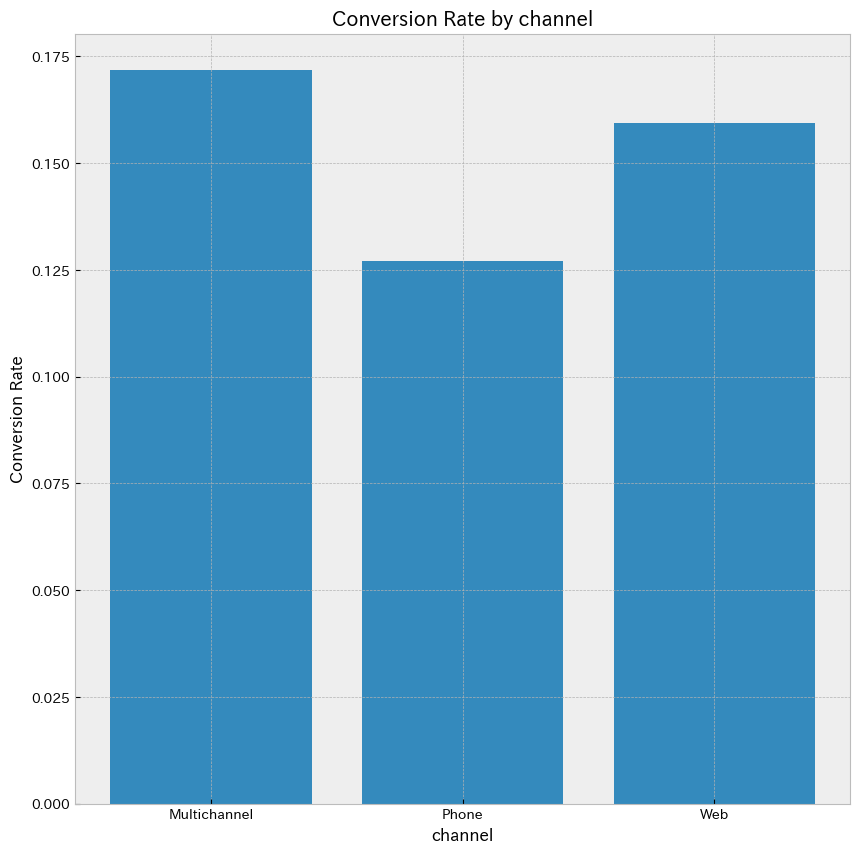

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

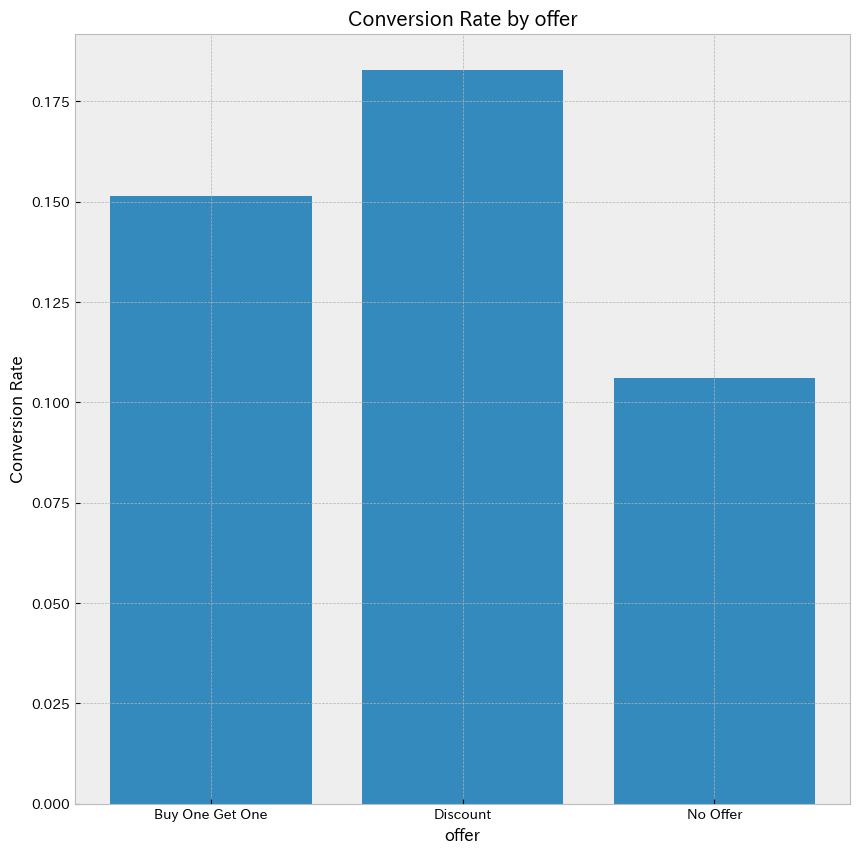

In [ ]:
# ---- カテゴリ別平均CV (バーグラフ) ----
for col in categorical_cols:
    conv_by_cat = df.groupby(col)['conversion'].mean().reset_index()
    plt.figure()
    plt.bar(conv_by_cat[col].astype(str), conv_by_cat['conversion'])
    plt.xlabel(col)
    plt.ylabel('Conversion Rate')
    plt.title(f'Conversion Rate by {col}')
    from google.colab import files
#画像を保存
    fn="fig_test2.png"
    plt.savefig(fn)
    files.download(fn)

    plt.show()


In [ ]:
# ---- カテゴリ変数 vs. conversion (Chi-square) ----
categorical_cols = ['used_discount','used_bogo','is_referral','zip_code','channel','offer']
for col in categorical_cols:
    crosstab = pd.crosstab(df[col], df['conversion'])
    chi2, p_val, dof, expected = stats.chi2_contingency(crosstab)
    print(f"\nChi-square test for {col} vs. conversion")
    print(crosstab)
    print(f"chi2 = {chi2:.3f}, p = {p_val:.3e}, dof = {dof}")



Chi-square test for used_discount vs. conversion
conversion         0     1
used_discount             
0              24592  4142
1              30014  5252
chi2 = 2.845, p = 9.164e-02, dof = 1

Chi-square test for used_bogo vs. conversion
conversion      0     1
used_bogo              
0           25174  3644
1           29432  5750
chi2 = 172.756, p = 1.851e-39, dof = 1

Chi-square test for is_referral vs. conversion
conversion       0     1
is_referral             
0            26343  5513
1            28263  3881
chi2 = 349.326, p = 5.940e-78, dof = 1

Chi-square test for zip_code vs. conversion
conversion      0     1
zip_code               
Rural        7764  1799
Surburban   24749  4027
Urban       22093  3568
chi2 = 153.508, p = 4.637e-34, dof = 2

Chi-square test for channel vs. conversion
conversion        0     1
channel                  
Multichannel   6429  1333
Phone         24458  3563
Web           23719  4498
chi2 = 160.697, p = 1.274e-35, dof = 2

Chi-square test for

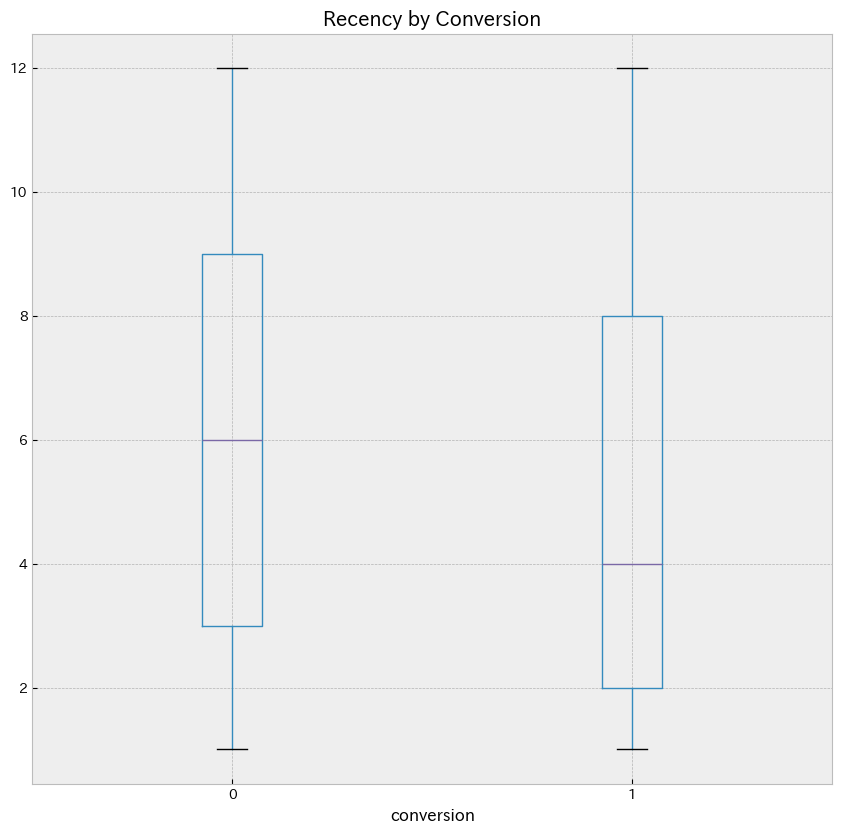

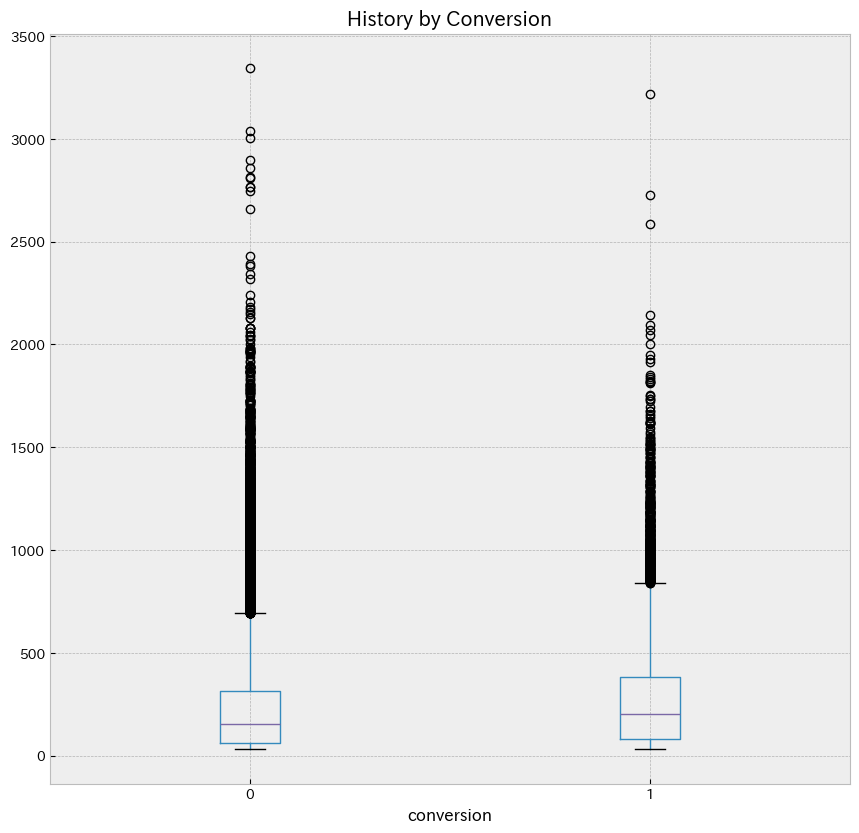

In [ ]:
# ---- Boxプロット (recency, history) ----
df.boxplot(column='recency', by='conversion')
plt.title('Recency by Conversion')
plt.suptitle("")
plt.show()

df.boxplot(column='history', by='conversion')
plt.title('History by Conversion')
plt.suptitle("")
plt.show()


In [ ]:
# ---- Point-Biserial相関 (数値変数 vs. conversion) ----
conversion = df['conversion']
r_recency, p_recency = stats.pointbiserialr(conversion, df['recency'])
r_history, p_history = stats.pointbiserialr(conversion, df['history'])
print("recency vs. conversion => r = {:.3f}, p = {:.3e}".format(r_recency, p_recency))
print("history vs. conversion => r = {:.3f}, p = {:.3e}".format(r_history, p_history))


recency vs. conversion => r = -0.075, p = 5.295e-80
history vs. conversion => r = 0.065, p = 3.678e-61


In [ ]:
df = pd.read_csv('/content/exercise.csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import japanize_matplotlib

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh')

plt.rcParams['figure.figsize'] = 10, 10

In [ ]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
